In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy 
import isi_a
import isi_b
import isi_I
import isi_tau

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


# **CONTROL**

In [2]:
# Original Variables


parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}


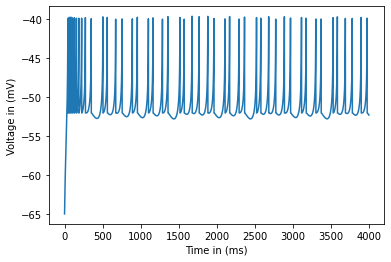

In [3]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
train = SpikeMonitor(neuron,record=True)
run(4000 * ms)

# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
# print(train.spike_trains())
difference  = numpy.diff(train.spike_trains()[0])
# print(difference)
plt.show()

# **Variating the injected current**

### $0,1nA$  

In [4]:
start_scope()
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

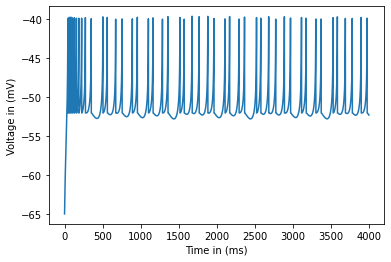

<Figure size 720x576 with 0 Axes>

In [5]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
# plt.xlim(500,1000)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
plt.figure(figsize=(10,8))
# 
plt.show()

### $0.5 nA$

In [6]:
start_scope()
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .025*nA,
}

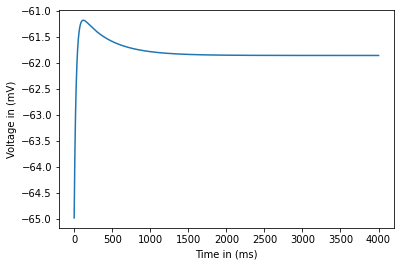

<Figure size 720x576 with 0 Axes>

In [7]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
# plt.xlim(500,1000)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
plt.figure(figsize=(10,8))
# 
plt.show()

### $1nA$

In [8]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 1*nA,
}

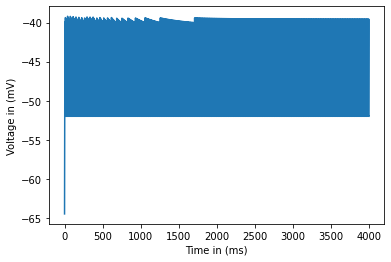

In [9]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5 nA$

In [10]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 5*nA,
}

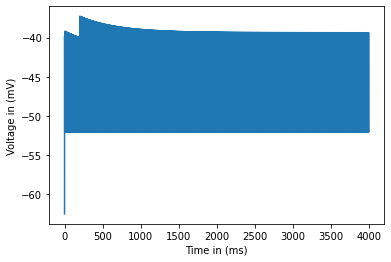

In [11]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10 nA$

In [12]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 10*nA,
}

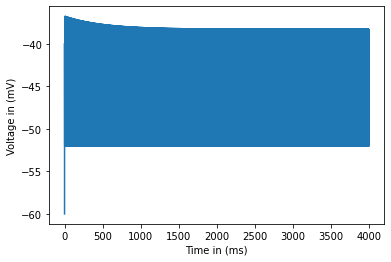

In [13]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of injected current $I$**

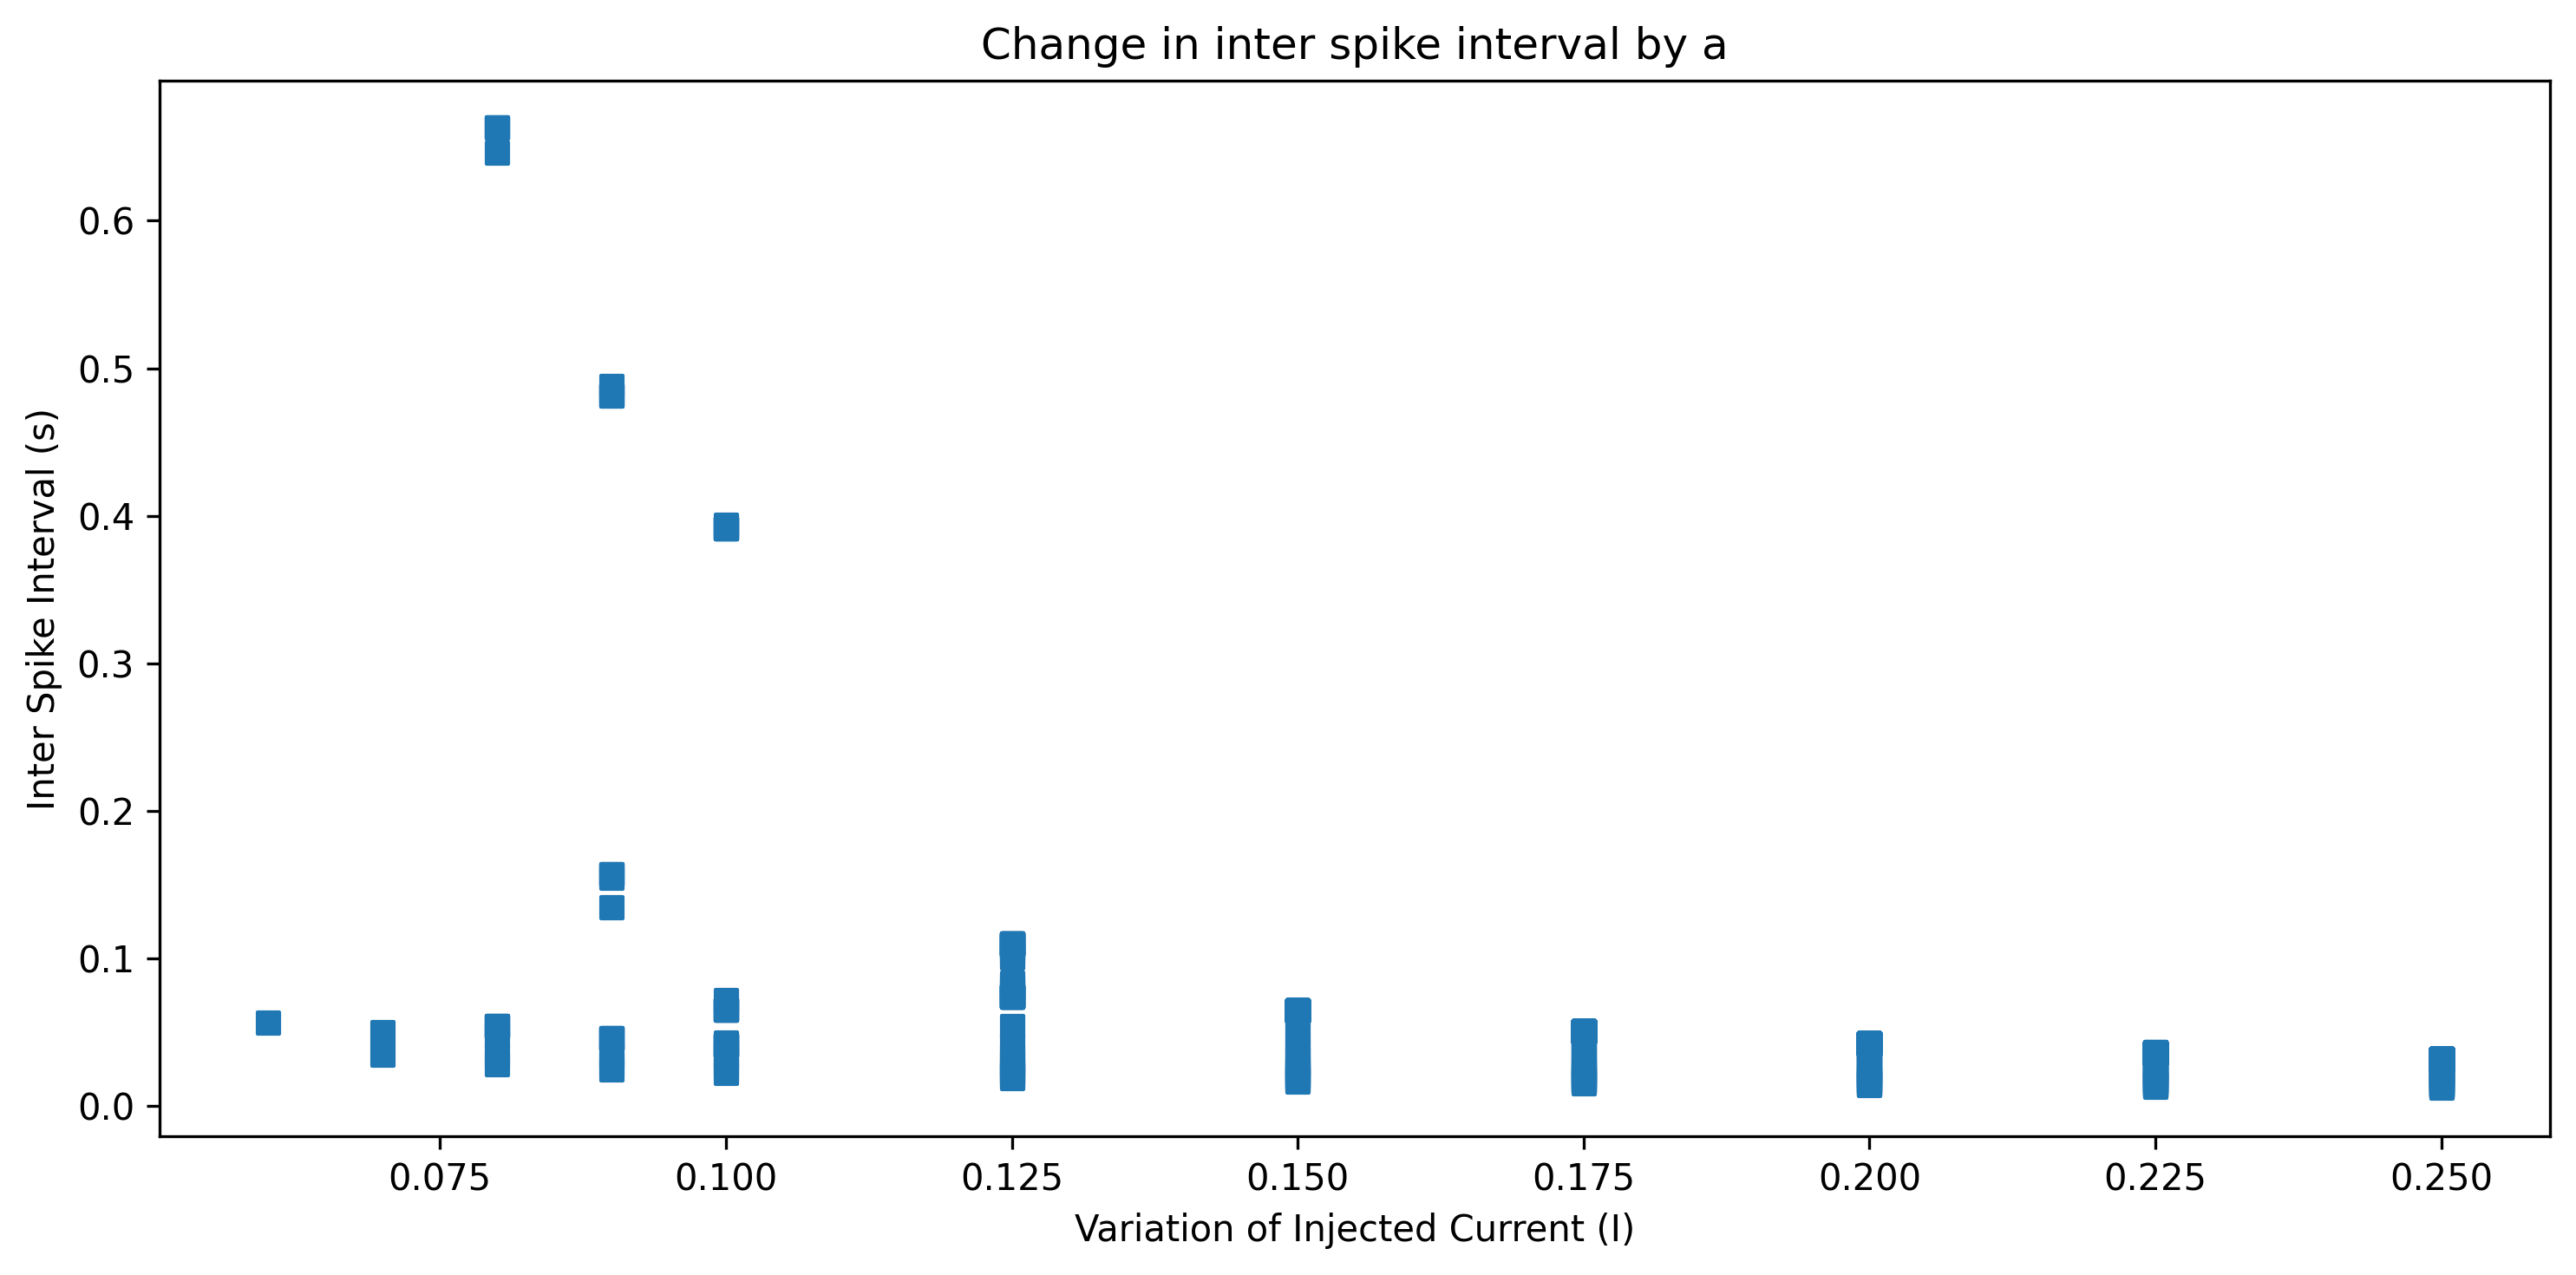

In [14]:
isi_I.I_plt(isi_I.df)

# **Variating values of $a$**

### $1nS$

In [15]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 1.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

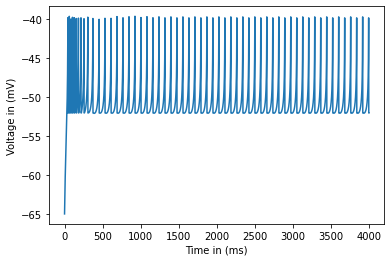

In [16]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $2nS$

In [17]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

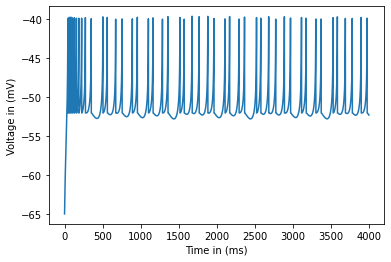

In [18]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5nS$

In [19]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 5.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

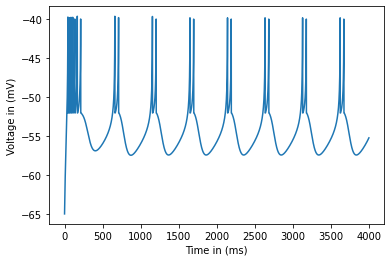

In [20]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10nS$

In [21]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 10.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

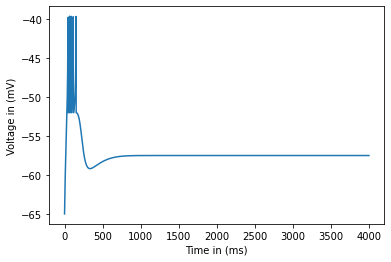

In [22]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of $a$**

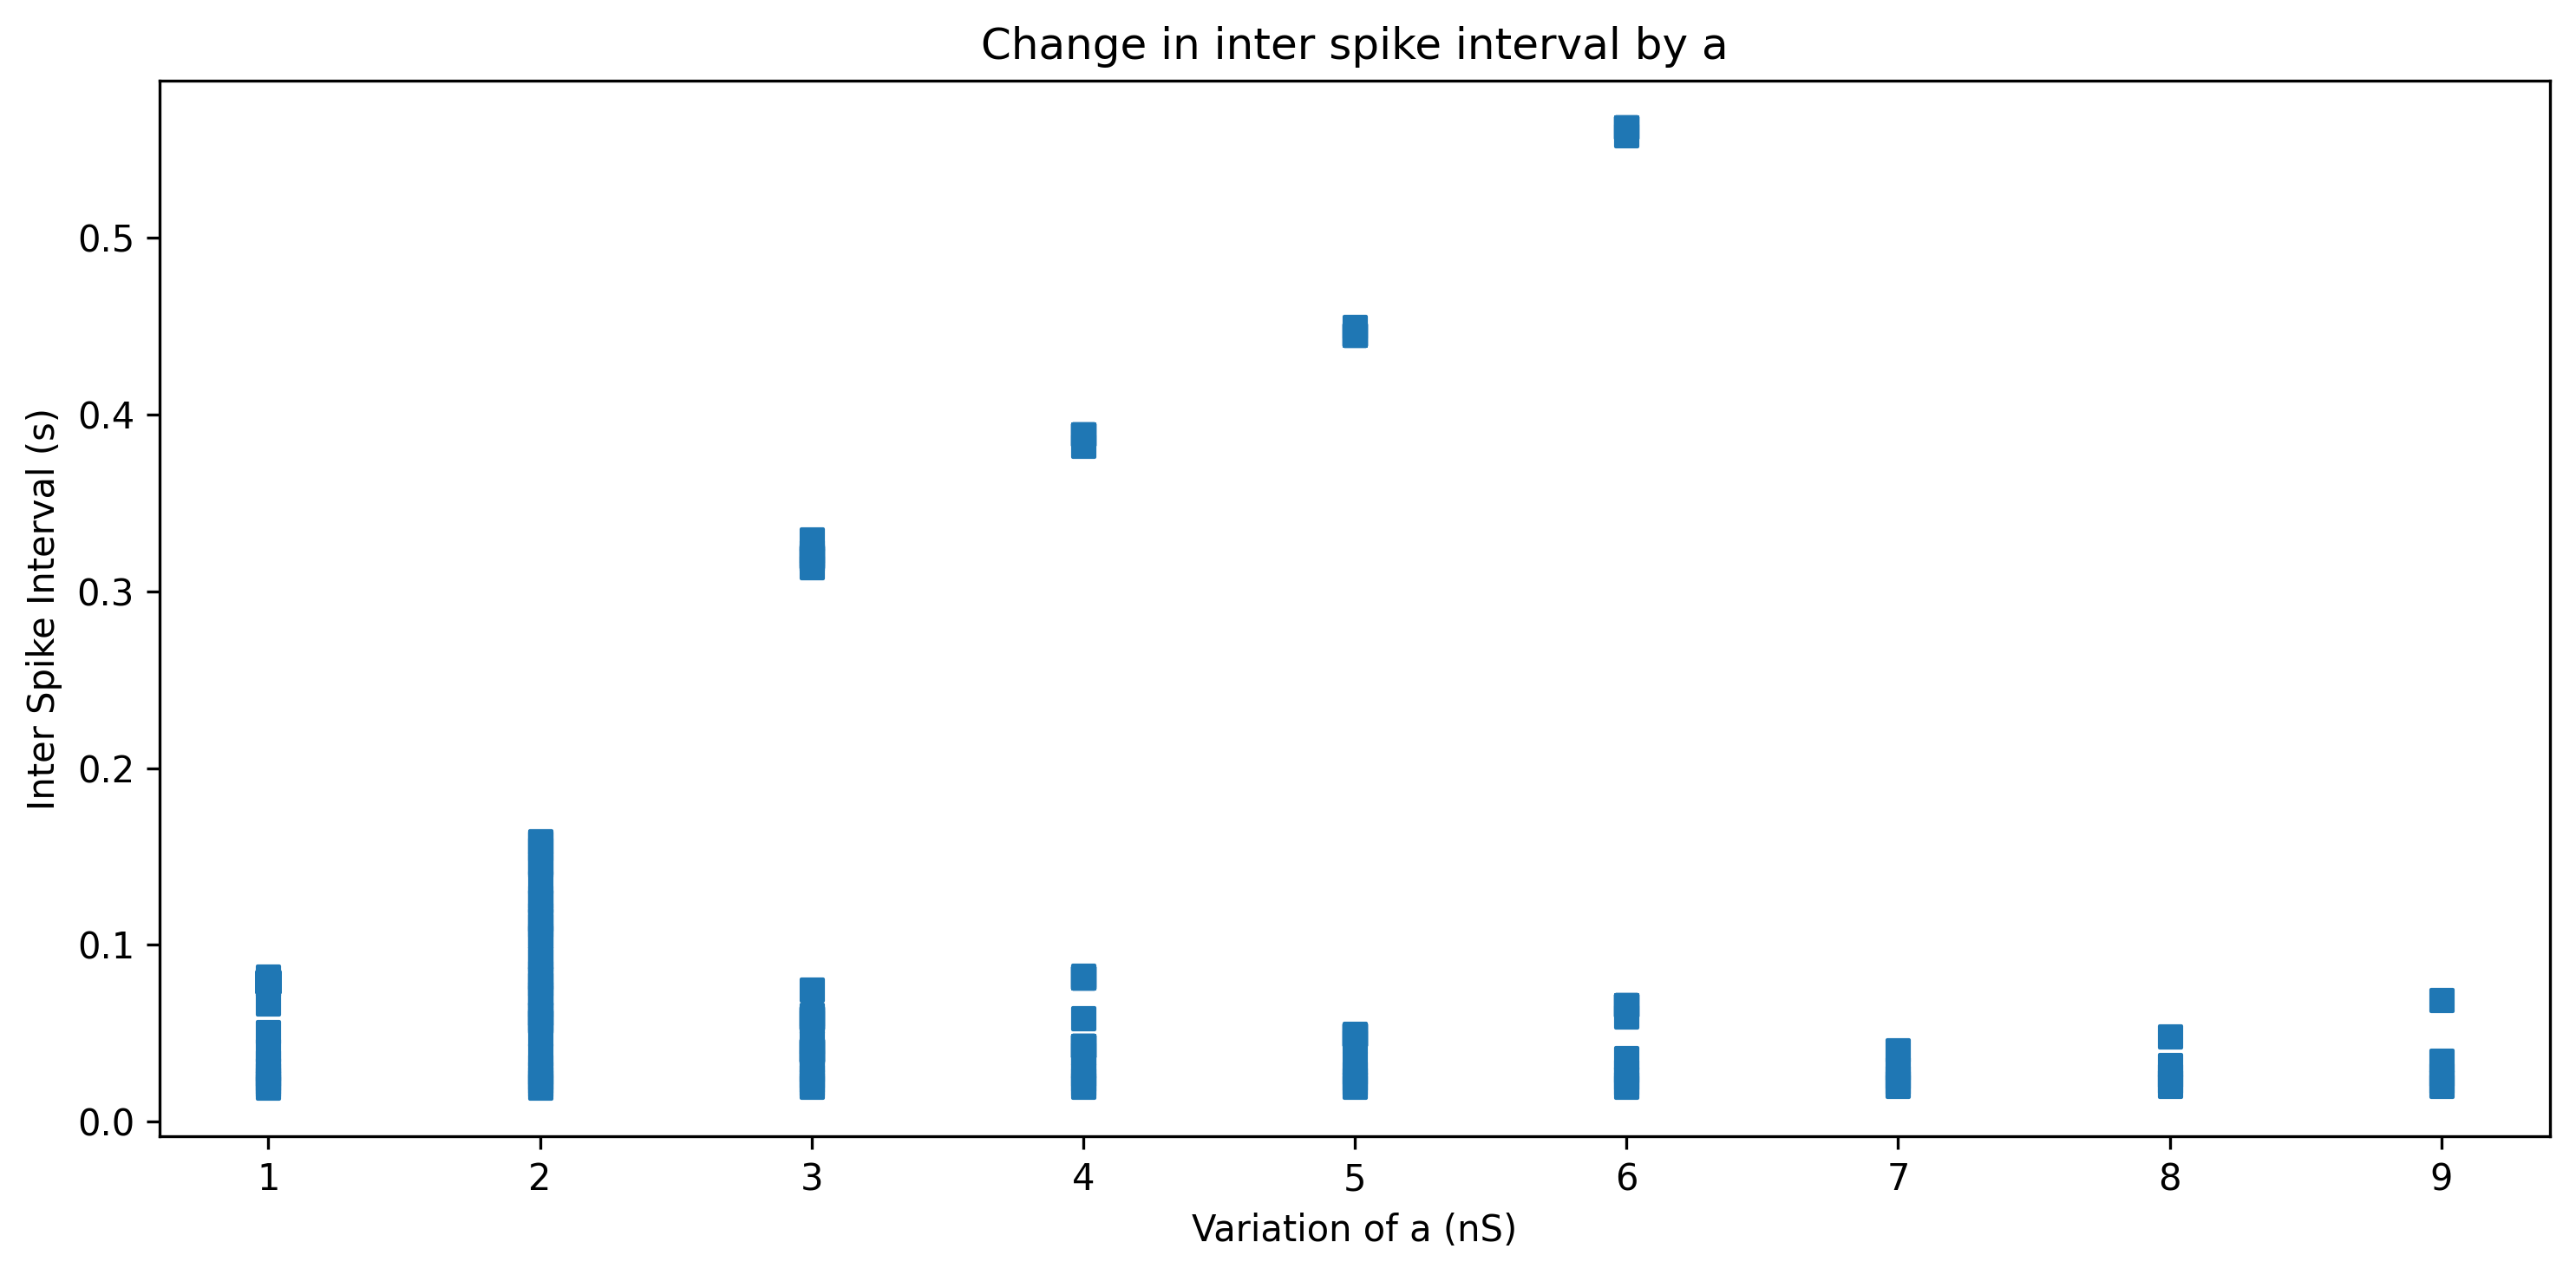

In [23]:
isi_a.a_plt(isi_a.df)

## **Variating the value of $b$**

### $1pA$

In [24]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 1.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

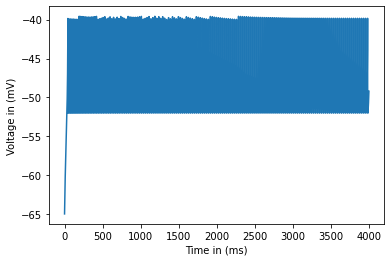

In [25]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5pA$

In [26]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 5.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

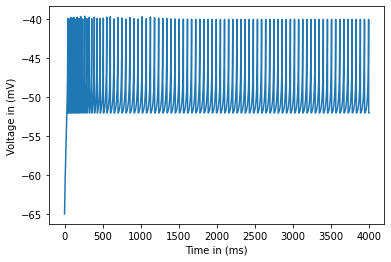

In [27]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### Control $10pA$

In [28]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

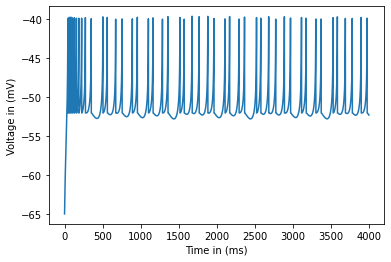

In [29]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $15pA$

In [30]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 15.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

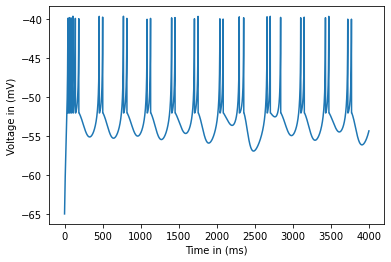

In [31]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $20pA$

In [32]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 20.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

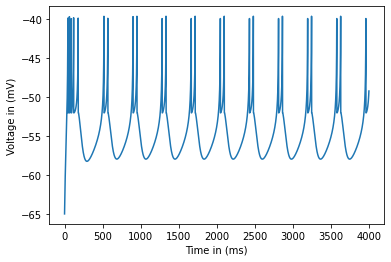

In [33]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of $b$**

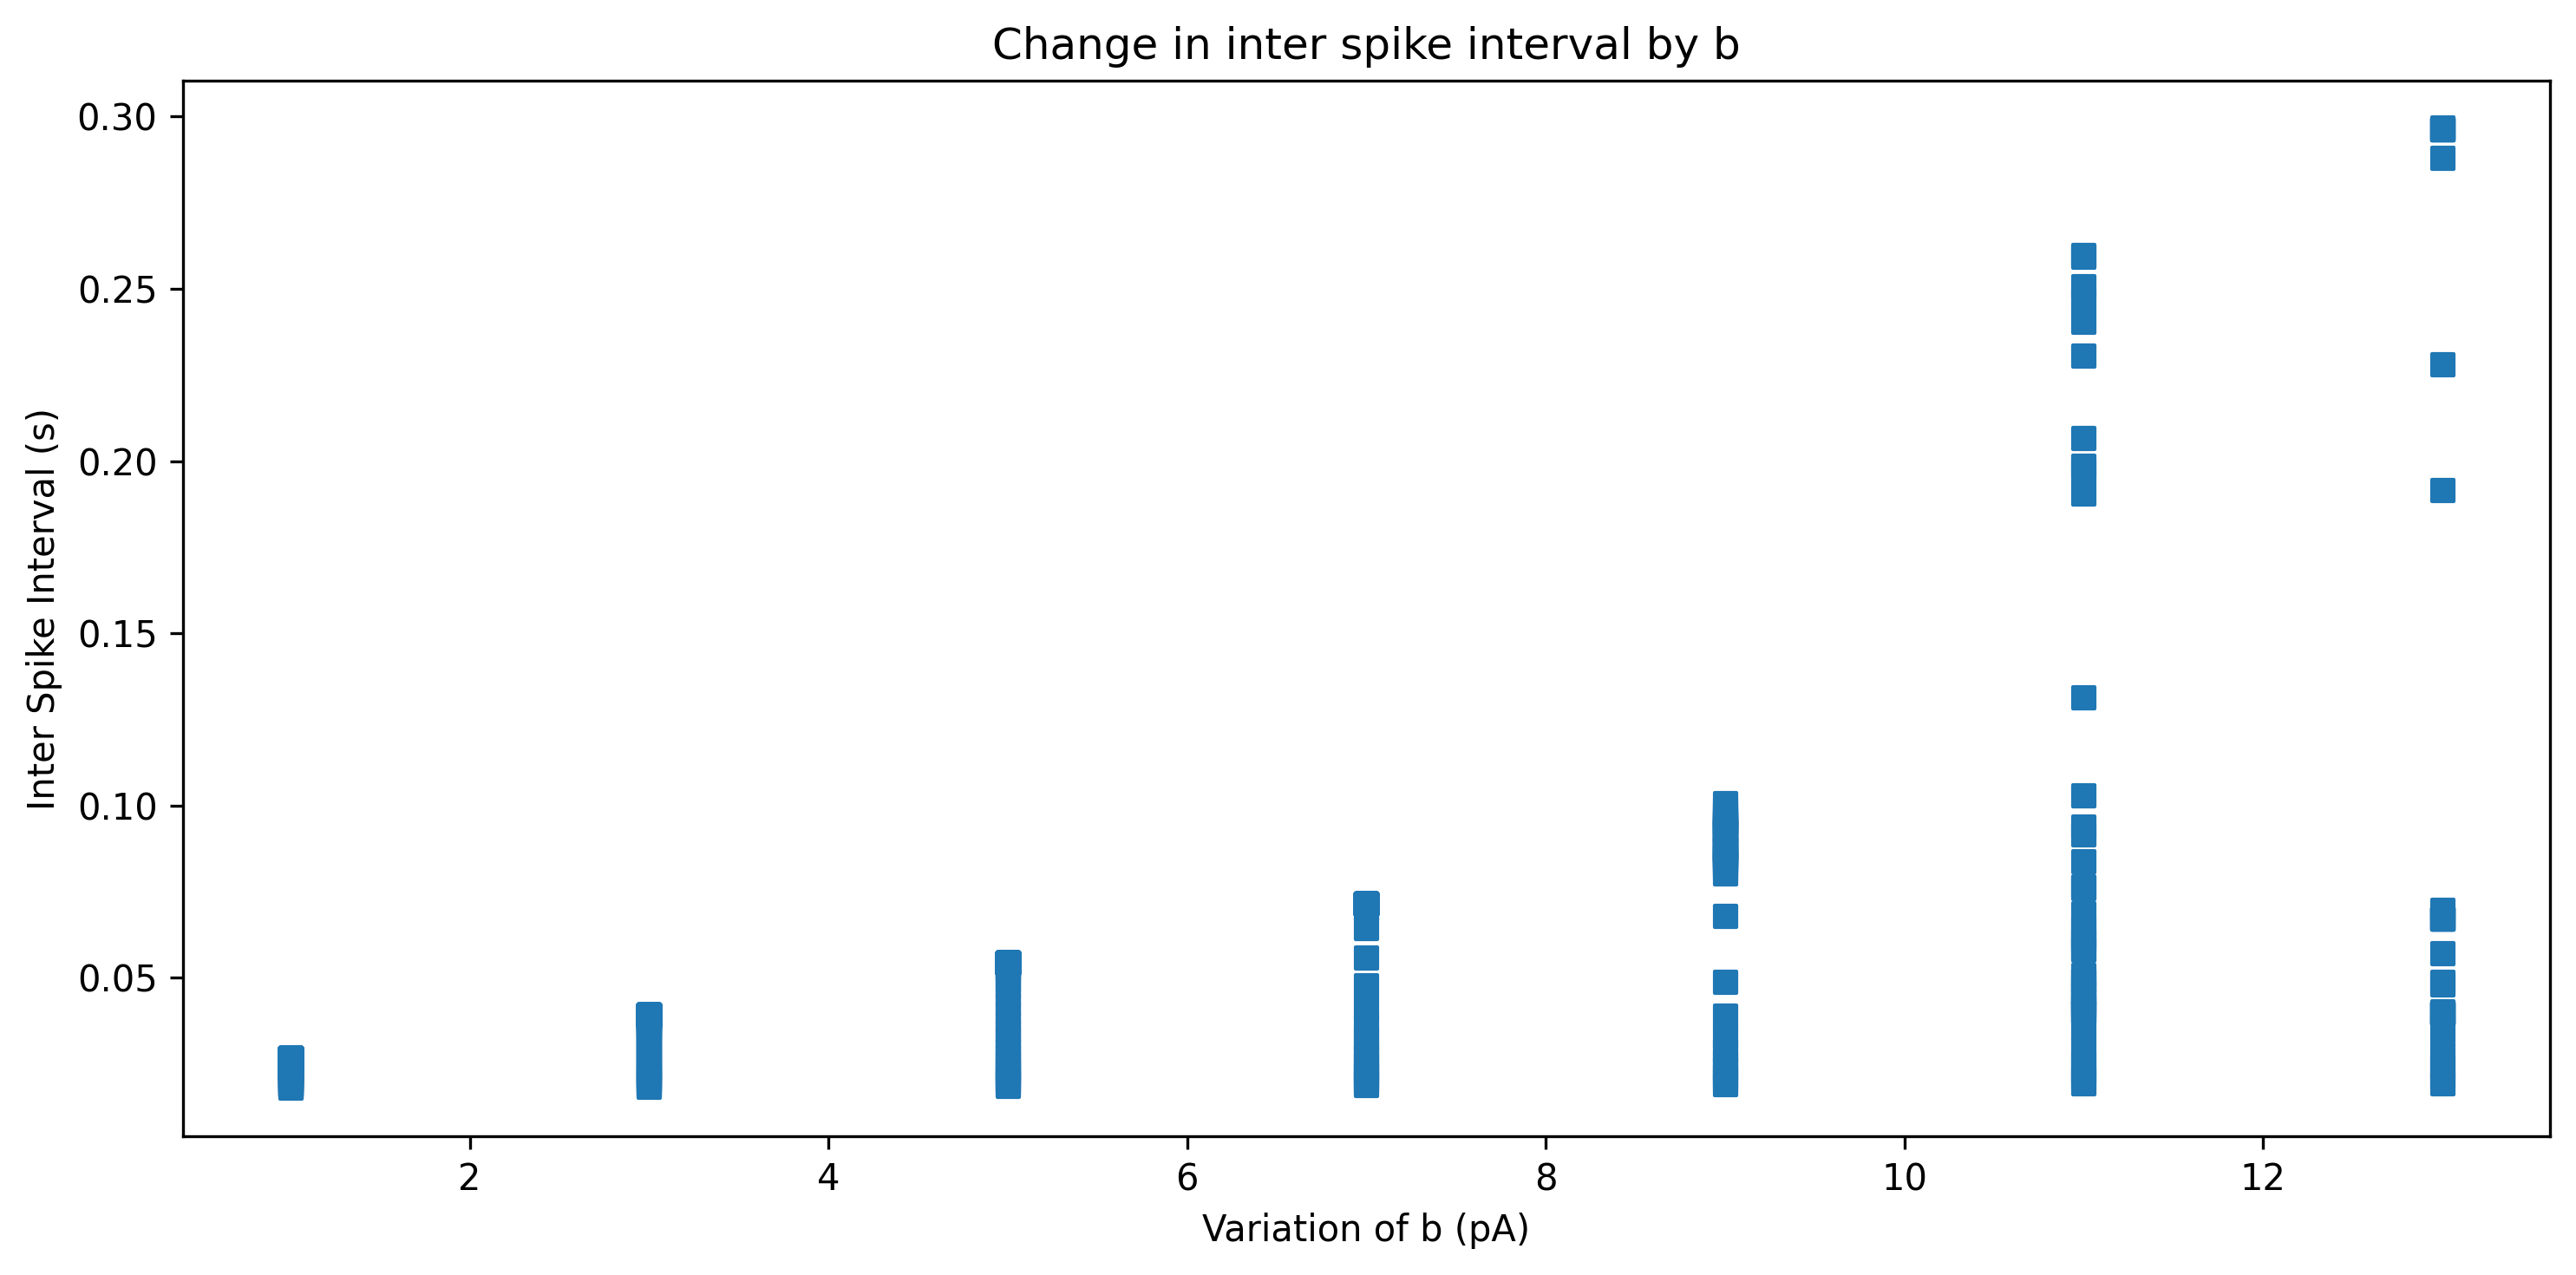

In [34]:
isi_b.b_plt(isi_b.df)

# **Variating values $tau$**

### $200ms$

In [35]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 200.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

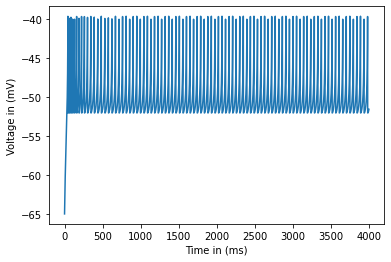

In [36]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $300ms$

In [37]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 300.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

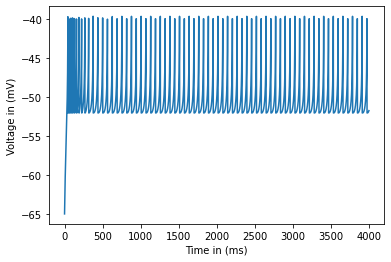

In [38]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $400ms$

In [39]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 400.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

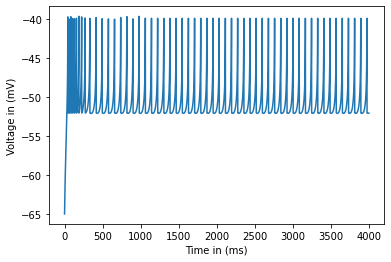

In [40]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $500ms$

In [41]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

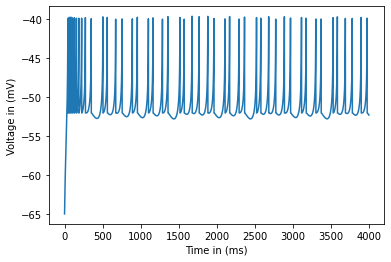

In [42]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $600ms$

In [43]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 600.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

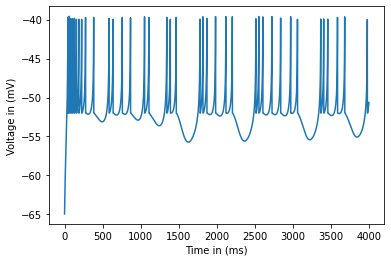

In [44]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $700ms$

In [45]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 700.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

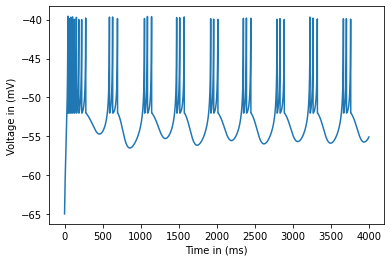

In [46]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $800ms$

In [47]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 800.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

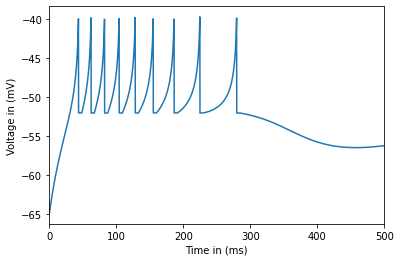

In [48]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(0,500)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $1000ms$

In [49]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 1000.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

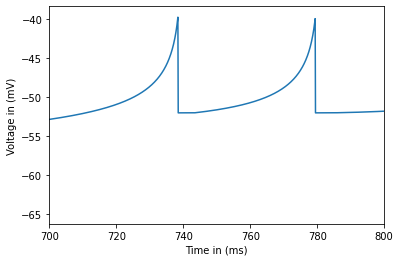

In [50]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(700,800)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of tau ($ms$)**

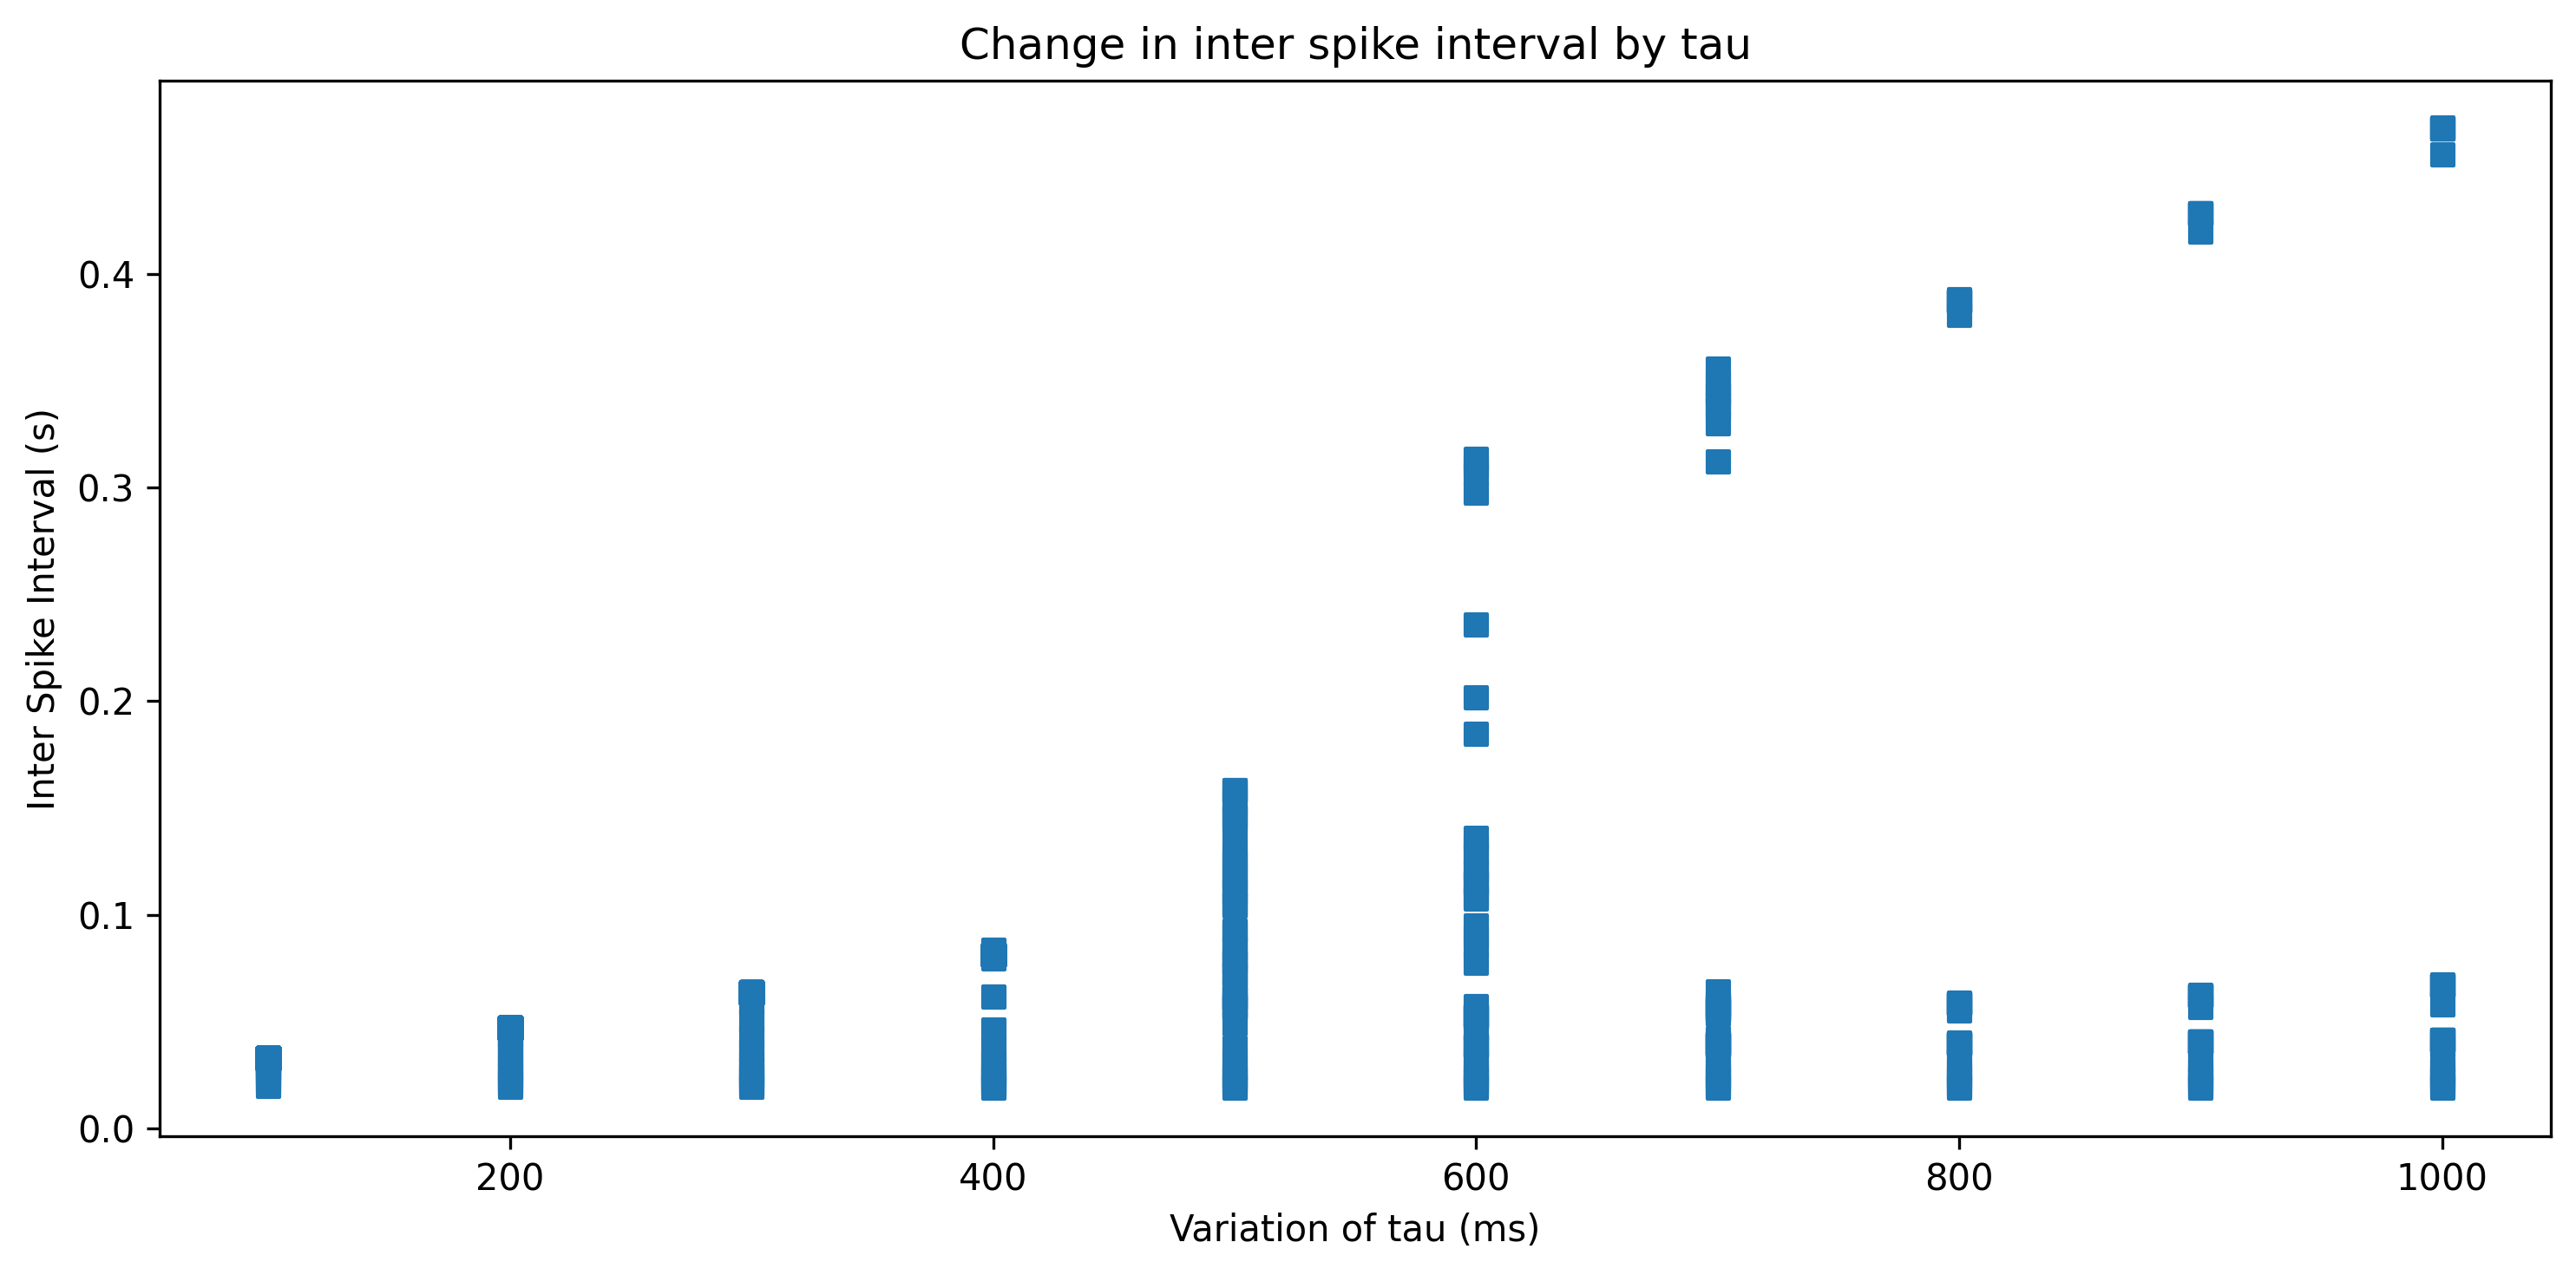

In [51]:
isi_tau.tau_plt(isi_tau.df)